# Analísis terremotos últimos 30 días

En este proyecto, vamos a realizar un análisis + visualización de los aspectos más relevantes de los terremotos de los últimos 30 días. Para ello, usaremos liberías de analísis de datos + lenguaje SQL. 


## Importación de librerías

In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_colwidth', None) #mostrar todo el contenido de la fila
pd.set_option('display.max_columns', None)

## Visión general del dataset

Aquí, visualizamos número de columnas, filas, tipo de dato, valores nulos... además de imprimir las 5 primeras filas del dataset para hacernos una idea de su contenido. 

In [2]:
#Concexión con duckdb para poder hacer consultas SQL 
con = duckdb.connect()

#Creación de la tabla con la información de los datasets
con.execute("CREATE OR REPLACE VIEW earthquakes AS SELECT * FROM read_csv_auto('all_month.csv', union_by_name=True, sample_size=100000)")

#Consulta
query = """
SELECT * FROM earthquakes

"""
#Conversión a df
df_earth = con.execute(query).df()

#Información general
df_earth.info(verbose=True, show_counts=True)
display(df_earth.head(10))

<class 'pandas.DataFrame'>
RangeIndex: 9951 entries, 0 to 9950
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype                        
---  ------           --------------  -----                        
 0   time             9951 non-null   datetime64[us, Europe/Madrid]
 1   latitude         9951 non-null   float64                      
 2   longitude        9951 non-null   float64                      
 3   depth            9951 non-null   float64                      
 4   mag              9946 non-null   float64                      
 5   magType          9946 non-null   str                          
 6   nst              9951 non-null   int64                        
 7   gap              9951 non-null   float64                      
 8   dmin             9951 non-null   float64                      
 9   rms              9951 non-null   float64                      
 10  net              9951 non-null   str                          
 11  id             

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2026-02-02 17:44:10.290000+01:00,37.765335,-121.934166,7.35,2.45,md,16,102.0,0.104200,0.04,nc,nc75305976,2026-02-02 17:45:45.181000+01:00,"4 km ESE of San Ramon, CA",earthquake,0.24,0.6300,0.090000,15,automatic,nc,nc
1,2026-02-02 17:42:42.190000+01:00,36.109667,-117.881000,3.34,1.96,ml,31,47.0,0.022590,0.15,ci,ci41178239,2026-02-02 17:46:26.040000+01:00,"9 km NE of Coso Junction, CA",earthquake,0.18,0.3300,0.204391,25,automatic,ci,ci
2,2026-02-02 17:38:17.970000+01:00,37.764832,-121.932167,6.42,2.19,md,10,104.0,0.105400,0.03,nc,nc75305961,2026-02-02 17:47:22.331000+01:00,"4 km ESE of San Ramon, CA",earthquake,0.31,1.0900,0.230000,11,automatic,nc,nc
3,2026-02-02 17:35:01.650000+01:00,38.838501,-122.837997,1.18,1.05,md,18,82.0,0.001963,0.03,nc,nc75305956,2026-02-02 17:36:40.415000+01:00,"10 km NW of The Geysers, CA",earthquake,0.20,0.4700,0.140000,19,automatic,nc,nc
4,2026-02-02 17:31:48.390000+01:00,35.941000,-117.735000,7.14,0.56,ml,20,49.0,0.067620,0.11,ci,ci41178231,2026-02-02 17:35:22.993000+01:00,"15 km E of Little Lake, CA",earthquake,0.17,0.4300,0.085541,6,automatic,ci,ci
5,2026-02-02 17:25:07.030000+01:00,37.762665,-121.932663,6.78,1.64,md,5,168.0,0.107700,0.03,nc,nc75305946,2026-02-02 17:28:20.744000+01:00,"4 km ESE of San Ramon, CA",earthquake,0.52,3.5600,0.060000,6,automatic,nc,nc
6,2026-02-02 17:19:42.940000+01:00,37.755165,-121.938499,7.28,2.16,md,23,47.0,0.101600,0.04,nc,nc75305931,2026-02-02 17:27:18.201000+01:00,"4 km SE of San Ramon, CA",earthquake,0.18,0.4500,0.150000,23,automatic,nc,nc
7,2026-02-02 17:06:13.300000+01:00,62.436000,-148.644000,40.30,1.40,ml,15,71.0,0.400000,0.60,ak,ak2026chzgua,2026-02-02 17:07:45.674000+01:00,"69 km ENE of Susitna North, Alaska",earthquake,5.70,8.1325,0.500000,4,automatic,ak,ak
8,2026-02-02 17:03:47.691000+01:00,64.949000,-147.404000,4.00,1.10,ml,14,58.0,0.200000,0.80,ak,ak2026chzerr,2026-02-02 17:04:59.819000+01:00,"10 km E of Fox, Alaska",earthquake,4.40,5.0423,0.300000,4,automatic,ak,ak
9,2026-02-02 16:59:39.820000+01:00,37.445835,-121.491501,5.60,1.93,md,7,153.0,0.466800,0.26,nc,nc75305916,2026-02-02 17:43:15.845000+01:00,"28 km WSW of Westley, CA",earthquake,3.48,7.0600,0.300000,2,automatic,nc,nc


Como vemos, hay algunas columnas importantes que presentan valores nulos (mag, magError) pero el tipo de dato de cada columna si parece estar correctamente refereciando con el tipo de datos que contiene. 

## Limpieza de datos

A continuación, vamos a seguir unos pasos con el objetivo de limpiar nuestro dataset para poder trabajar mejor con él y poder crear posteriormente mejores visualizaciones. 


### Valores nulos en la columna "mag"

Como son solo 5 las filas que presentan un valor nulo en la columna "mag", mantendremos el dataset original pero eliminando esas 5 filas: 

In [3]:
df_earth_clean = con.execute("""
    SELECT * FROM earthquakes 
    WHERE mag IS NOT NULL
""").df()

### Columna "place"

La columna place tiene la siguiente forma -> 4 km ESE of San Ramon, CA. Nuestro objetivo, es quedarnos solo, con el lugar que está detrás de la coma. De este modo, luego podremos estandarizar esta columna y lograr representaciones en mapas. Para ello: 


In [4]:
df_location = con.execute("""
    SELECT 
        place,
        -- Dividimos por la coma y cogemos la parte final (-1)
        -- Usamos TRIM para quitar espacios sobrantes
        TRIM(SPLIT_PART(place, ',', -1)) as Location
    FROM earthquakes
""").df()

df_location.head()

,place,Location
0,"4 km ESE of San Ramon, CA",CA
1,"9 km NE of Coso Junction, CA",CA
2,"4 km ESE of San Ramon, CA",CA
3,"10 km NW of The Geysers, CA",CA
4,"15 km E of Little Lake, CA",CA


Unimos el dataset limpio con la columna nueva creada: 

In [5]:
df_final = pd.merge(df_earth_clean, df_location, how= 'left', on= "place")

df_final.head()
df_final.tail()




,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Location
161871,2026-01-03 18:18:29.479000+01:00,60.076000,-140.790000,10.90,1.90,ml,13,161.0,0.30000,1.10,ak,ak2026aezwqy,2026-01-03 18:20:26.584000+01:00,"83 km NW of Yakutat, Alaska",earthquake,0.00,2.6532,0.200000,4,automatic,ak,ak,Alaska
161872,2026-01-03 18:06:56.750000+01:00,33.380667,-116.414667,12.26,1.12,ml,54,38.0,0.06690,0.21,ci,ci41151719,2026-01-05 15:16:18.290000+01:00,"14 km NNW of Borrego Springs, CA",earthquake,0.20,0.4900,0.200492,28,reviewed,ci,ci,CA
161873,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA
161874,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA
161875,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA


In [6]:
#Lo registramos con nombre de tabla
con.register('earthquakes_final', df_final)

## Detección de outliers

El primer reto es saber si un valor puede ser considerado anómalo y el segundo será establecer un umbral a partir del cuál podamos considerar a los valores outliers. 
Una de las formas para superar estos dos retos es ordenar los valores para encontrar las anomalías. 


### Ordenar para encontrar outliers

La función ORDER BY nos permite ordenar una o más columnas de forma ascendente (ASC) o (DESC). Por ejemplo, podemos ordenar los valores según su magnitud (de forma descendente): 

In [7]:
df_order_by_mag = con.execute("""SELECT mag FROM earthquakes_final
                                ORDER BY mag DESC""").df()
df_order_by_mag.head()

,mag
0,6.4
1,6.4
2,6.2
3,6.2
4,6.1


Si hubiera aparecido alguno de magnitud 9 podríamos haberlo clasificado como outlier. Como no es el caso, y no podemos comprobar todas las filas, podemos detectar los outliers (valores raros que por definición aparecen pocas veces) calculando el número de terremotos que han ocurrido según su magnitud. Para ello, usaremos la función GROUP BY, que nos permite agrupar los terremotos según un atributo (en este caso mag que es el que nos interesa):

In [8]:
df_group_by_mag_high = con.execute("""SELECT mag, COUNT(id) as earthquakes, 
                              -- Obtenemos también el porcentaje
                              round(COUNT(id) * 100 / SUM(count(id)) OVER (), 8) as pct_earthquakes
                              FROM earthquakes_final
                              GROUP by mag
                              ORDER BY mag DESC""").df()

df_group_by_mag_high.head()

,mag,earthquakes,pct_earthquakes
0,6.4,2,0.001236
1,6.2,2,0.001236
2,6.1,6,0.003707
3,6.0,15,0.009266
4,5.9,3,0.001853


Hacemos lo mismo con los terremotos de valores pequeños: 

In [9]:
df_group_by_mag_low = con.execute("""SELECT mag, COUNT(id) as earthquakes, 
                              -- Obtenemos también el porcentaje
                              round(COUNT(id) * 100 / SUM(count(id)) OVER (), 8) as pct_earthquakes
                              FROM earthquakes_final
                              GROUP by mag
                              ORDER BY mag""").df()

df_group_by_mag_low.head()

,mag,earthquakes,pct_earthquakes
0,-1.77,4,0.002471
1,-1.41,8,0.004942
2,-1.33,15,0.009266
3,-1.32,45,0.027799
4,-1.29,70,0.043243


### Calcular percentiles y desviación estándar

Los percentiles representa la proporción de valores en una distribución que están por debajo de un valor particular. Por ejemplo, la mediana es el valor en el que la mitad de la población se encuentra por debajo y la otra mitad por encima. 
Asi pues, vamos a seleccionar una localización, observar la magnitud de sus terremotos y calcular el percentil para cada una de ellas. De este modo, puedo saber como de grande es un terremoto en concreto.

In [10]:
df_CA = con.execute("""SELECT Location, mag, percentile
,count(*) as count
FROM
(
 SELECT Location, mag
 ,percent_rank() over (partition by Location order by mag) as percentile
 FROM earthquakes_final
 WHERE location = 'CA'
) a
GROUP BY 1,2,3
ORDER BY 1,2 desc""").df()

df_CA.head()

,Location,mag,percentile,count
0,CA,4.922556,0.999003,127
1,CA,4.420000,0.998956,6
2,CA,4.270000,0.998948,1
3,CA,4.255922,0.997943,127
4,CA,4.180000,0.997730,27


Por ejemplo, para el terremoto de magnitud 4.18, vemos que en California han ocurrido 27 en los últimos 30 días y el 99.7% de los terremotos han sido de una magnitud menor. 

Además de calcular el percentil exacto para cada fila, SQL nos permite dividir los datos en un número específico de bloques y devolver el bloque al cual pertenece cada fila. Por ejemplo, podemos dividir nuestro dataset en 100 bloques: 

In [11]:
df_alaska_100 = con.execute("""SELECT Location, mag
                                ,ntile(100) OVER (PARTITION BY Location ORDER BY mag) as ntile
                            FROM df_final
                            WHERE Location = 'Alaska' 
                            ORDER BY 1,2 DESC""").df()

df_alaska_100.head()



,Location,mag,ntile
0,Alaska,5.9,100
1,Alaska,5.3,100
2,Alaska,5.2,100
3,Alaska,5.1,100
4,Alaska,5.0,100


Como vemos, todos los valores mayores que 5 se encuentran en el percentil 100. Una vez hemos calculado estos bloques, podemos también calcular sus límites, con el objetivo de conocer qué rango de valores forma cada bloque: 

In [12]:
df_bucket = con.execute("""SELECT Location, ntile
                            ,max(mag) as maximum
                            ,min(mag) as minimum
                        FROM
                            (
                                SELECT Location, mag
                                    ,ntile(4) OVER (PARTITION BY Location ORDER BY mag) as ntile
                                FROM df_final
                                WHERE Location == 'Alaska'
                            ) 
                        GROUP BY 1,2
                        ORDER BY 1,2 DESC""").df()

df_bucket.head()


,Location,ntile,maximum,minimum
0,Alaska,4,5.90,2.00
1,Alaska,3,2.00,1.10
2,Alaska,2,1.10,-0.64
3,Alaska,1,-0.64,-1.77


Podemos observar que el primer grupo, el cual comprender los valores entre el 75th y el percentil 100th es el que presente un mayor rango de valores. 

Por último, SQL nos permite obtener percentiles específicos dentro de nuestro dataset. Por ejemplo, vamos a calcular el percentil 25 para la mag y depth en Alaska y CA: 

In [13]:
df_percentiles = con.execute("""SELECT Location, 
                                    percentile_cont(0.25) within group (ORDER BY mag) as pct_25_mag,
                                    percentile_cont(0.25) within group (ORDER BY depth) as pct_25_depth
                                FROM df_final
                                WHERE Location IN ('Alaska', 'CA')
                                GROUP BY Location""").df()

df_percentiles.head()

,Location,pct_25_mag,pct_25_depth
0,CA,0.74,2.03
1,Alaska,-0.64,1.09


Para calcular la mediana (percentil 50) existe una función específica. 

Por otro lado, para medir como de extremos son los valores dentro del dataset, podemos usar la desviación estándar. Una vez calculada, también podemos obtener el z-score de cada valor (número de desviaciones estándar respecto a la media): 


In [14]:
df_std_dev = con.execute("""SELECT a.Location, a.mag
                                ,b.avg_mag, b.std_dev
                                ,(a.mag - b.avg_mag) / b.std_dev as z_score
                                FROM df_final a
                                JOIN
                                    (
                                        SELECT avg(mag) as avg_mag
                                            ,stddev(mag) as std_dev
                                        FROM df_final
                                    ) b on 1 = 1
                            ORDER BY 2 DESC""").df()

df_std_dev.head()


,Location,mag,avg_mag,std_dev,z_score
0,Philippines,6.4,1.106387,0.817422,6.475983
1,Philippines,6.4,1.106387,0.817422,6.475983
2,Russia,6.2,1.106387,0.817422,6.231311
3,Russia,6.2,1.106387,0.817422,6.231311
4,Japan region,6.1,1.106387,0.817422,6.108975


### Visualizando anomalías


Una de las gráficas clave para visualizar posible anomolías es conocer la distribución de nuestra muestra a partir de un histograma: 

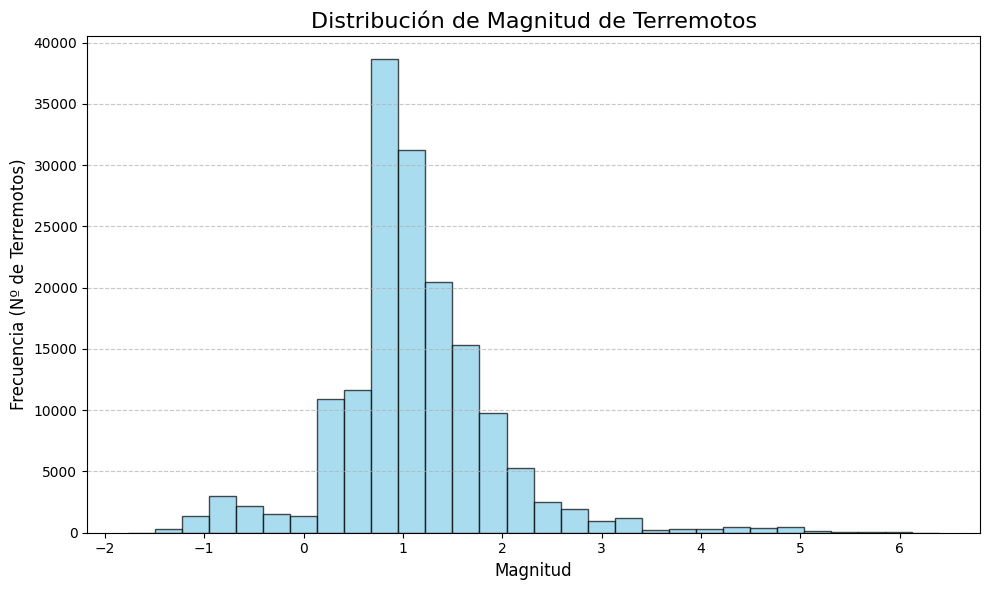

In [15]:
# 1. Configurar el tamaño del gráfico 
plt.figure(figsize=(10, 6))

# 2. Crear el histograma
plt.hist(df_final['mag'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# 3. Añadir títulos y etiquetas 
plt.title('Distribución de Magnitud de Terremotos', fontsize=16)
plt.xlabel('Magnitud', fontsize=12)
plt.ylabel('Frecuencia (Nº de Terremotos)', fontsize=12)

# 4. Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Mostrar 
plt.tight_layout()  
plt.show()


Como podemos ver, la mayoría de los terremotos se encuentran comprendidos entre los valores 0 y 2 de magnitud (con asi 40.00 terremos entorno a 1), mientras que solo unos pocos superan el valor de magnitud 5 (valores extremos).

Si queremos centrarnos un poco más en esos valores extremos, podemos visualizar la distrubución de, por ejemplo, las 10 magnitudes más altas registradas: 

In [16]:
df_10_mag = con.execute("""SELECT mag, COUNT(*) as earthquakes
                        FROM df_final
                        GROUP BY mag
                        ORDER BY mag DESC
                        LIMIT 10""").df()

df_10_mag.head(10)

,mag,earthquakes
0,6.4,2
1,6.2,2
2,6.1,6
3,6.0,15
4,5.9,3
5,5.8,3
6,5.7,6
7,5.6,26
8,5.5,26
9,5.4,31


Si representamos: 

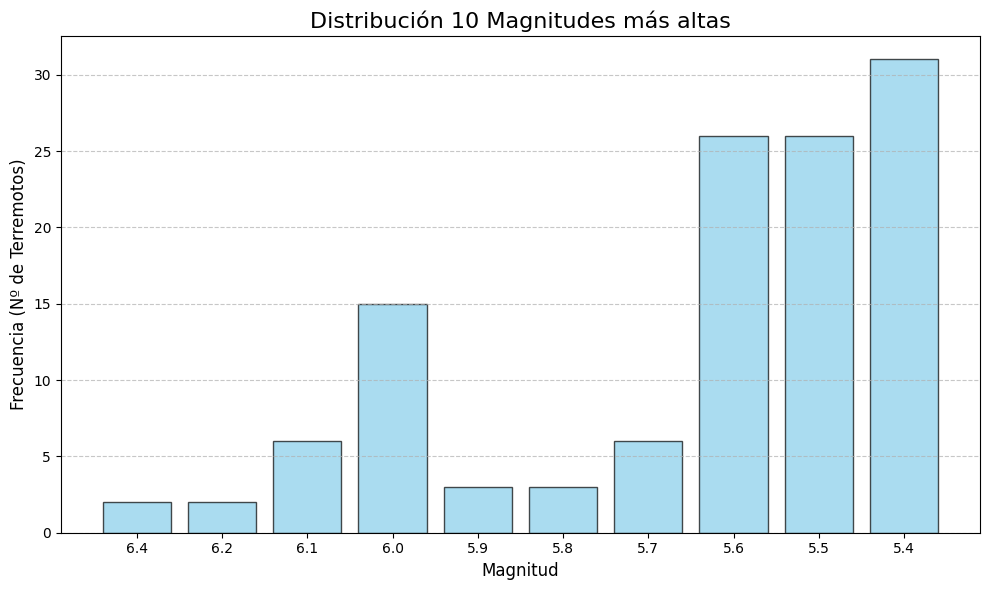

In [17]:
# 1. Configurar el tamaño del gráfico 
plt.figure(figsize=(10, 6))

# 2. Crear el histograma (que en este caso será un gráfico de barras)
plt.bar(df_10_mag['mag'].astype(str), df_10_mag['earthquakes'], color='skyblue', edgecolor='black', alpha=0.7)

# 3. Añadir títulos y etiquetas 
plt.title('Distribución 10 Magnitudes más altas', fontsize=16)
plt.xlabel('Magnitud', fontsize=12)
plt.ylabel('Frecuencia (Nº de Terremotos)', fontsize=12)

# 4. Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Mostrar 
plt.tight_layout()  
plt.show()

Commo podemos observar, los terremotos con una magnitud superior a 5.6 han sido bastante extraños en el último més. 

Otro gráfico que nos puede ayudar a detectar posibles valores extremos, es el scatter plot, el cuál nos va a permitir ver la relación que existe entre dos variables numéricas, en nuestro caso mag y depth: 

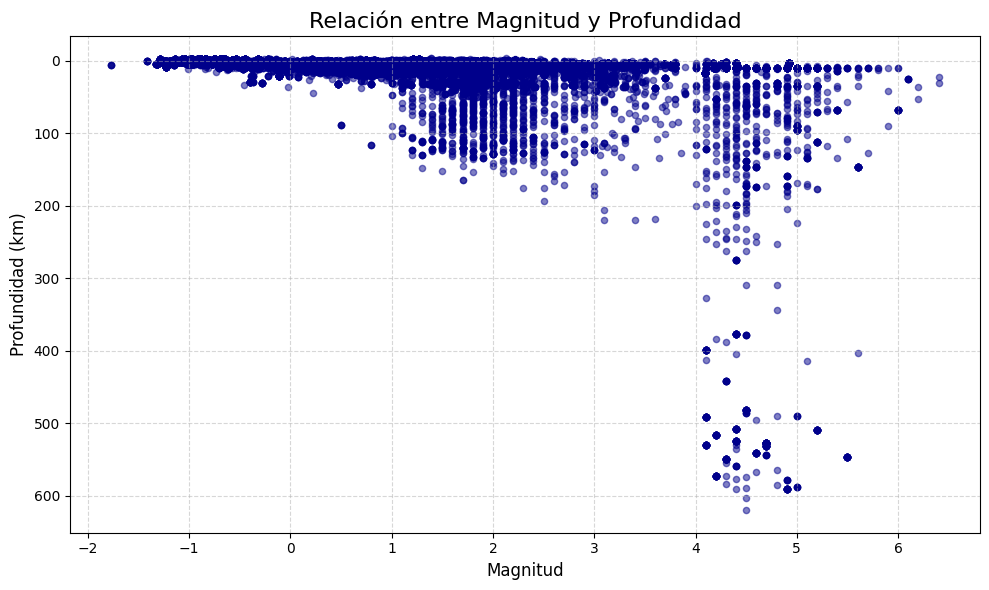

In [18]:
# 1. Configurar el tamaño
plt.figure(figsize=(10, 6))

# 2. Crear el gráfico
plt.scatter(df_final['mag'], df_final['depth'], alpha=0.5, c='darkblue', s=20)

# 3. Etiquetas y Título
plt.title('Relación entre Magnitud y Profundidad', fontsize=16)
plt.xlabel('Magnitud', fontsize=12)
plt.ylabel('Profundidad (km)', fontsize=12)

# 4. Cuadrícula
plt.grid(True, linestyle='--', alpha=0.5) 

# He descubierto que en geología suele hacerse así (tiene sentido puesto que es profundidad)
plt.gca().invert_yaxis()

# 5. Mostrar
plt.tight_layout()
plt.show()

De aquí observamos que mayor profundidad no implica una mayor magnitud. Parece ser que los terremotos que se producen a mayor profunidad suelen estar entre los 4 y los 5 de magnitud. 

Otro de los gráficos utilizados para detectar valores extremos es el box plot: 

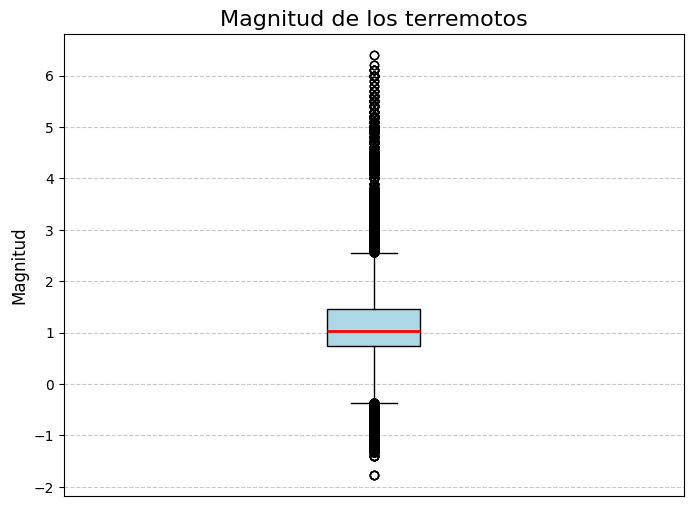

In [19]:
# 1. Configurar tamaño
plt.figure(figsize=(8, 6))

# 2. Crear el Boxplot
plt.boxplot(df_final['mag'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'), # Color de la caja
            medianprops=dict(color='red', linewidth=2))          # Color de la mediana

# 3. Etiquetas
plt.title('Magnitud de los terremotos', fontsize=16)
plt.ylabel('Magnitud', fontsize=12)

# Quitar las marcas del eje X 
plt.xticks([]) 

# 4. Cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Mostrar
plt.show()

De la interpretación de este gráfico podemos sacar: 
- La mayoría de valores se encuentrarn en torno a la magnitud 1, de ahí que la caja sea estrecha (coincide con el histograma generado anteriormente.)
- Observamos una gran cantidad de outliers tanto por debajo como por encima del 1.5* Rango intercuartílico. Esto nos indica, confirmando con el histograma, que la distriución de los datos se aleja de una distribución normal, puesto que presenta un gran pico en el medio y luego colas con bastantes datos a ambos lados. 

Concluimos que la magnitud de los terrremotos es muy variable. Por tanto, la media no representaría bien el riesgo, ya que existen colas "pesadas" que indican que, aunque poco frecuentes, los eventos extremos (altos y bajos) son una parte fundamental de su naturaleza. 

Si quisieramos comprobar mátematicamente la asimetríca y la diferencia de nuestra distribución con la campana de Gauss: 

In [20]:
# Asimetría (Skewness):
asimetria = df_final['mag'].skew()

# Curtosis (Kurtosis):
curtosis = df_final['mag'].kurtosis()

print(f"Asimetría (Skewness): {asimetria:.2f}")
print(f"Curtosis (Kurtosis): {curtosis:.2f}")


Asimetría (Skewness): 0.90
Curtosis (Kurtosis): 4.38


Estos valores nos indican: 
- Existe una cola en valores altos (Skewness 0.9) lo que hará que la media de la magnitud sea más alta que la mediana, pues esos valores la inflarán. 
- Comparada con la campana de Gauss, nuestro pico es muy agudo y nuestras colas contienen demasiados datos. 

Ahora, para obtener más información acerca de esos outliers, vamos a genera un boxplot por cada semamana del mes, con el objetivo de comprobar la distribución a lo largo de este: 

C:\Users\ronge\AppData\Local\Temp\ipykernel_10340\2359604389.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_para_plot, labels=etiquetas, patch_artist=True)


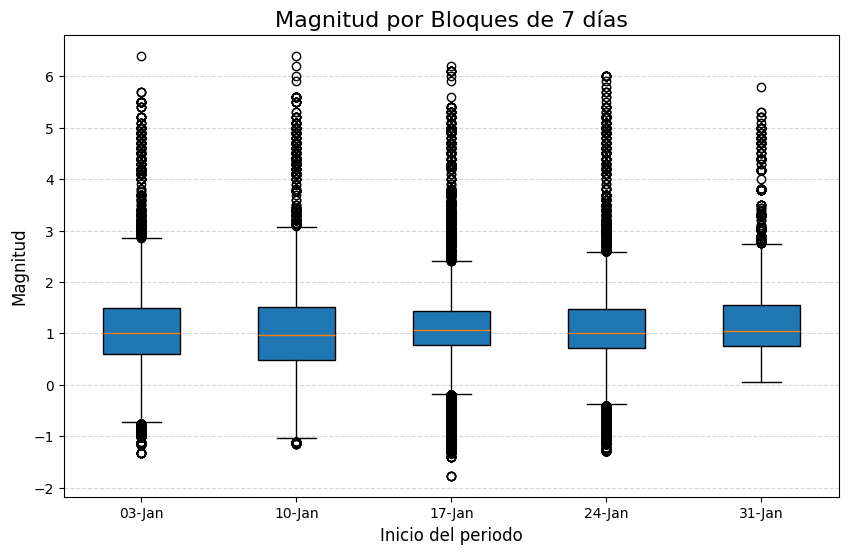

In [21]:
# Aseguramos formato fecha
df_final['time'] = pd.to_datetime(df_final['time'], format='mixed')

# Agrupamos los días en bloques de 7 (simulando semanas)
grouper = df_final.groupby(pd.Grouper(key='time', freq='7D'))

# Preparamos los datos para el boxplot
datos_para_plot = []
etiquetas = []

for nombre_periodo, datos_grupo in grouper:
    # Solo añadimos si hay datos en ese periodo
    if not datos_grupo.empty:
        datos_para_plot.append(datos_grupo['mag'].dropna())
        # Creamos la etiqueta
        etiqueta = f"{nombre_periodo.strftime('%d-%b')}"
        etiquetas.append(etiqueta)

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(datos_para_plot, labels=etiquetas, patch_artist=True)

plt.title('Magnitud por Bloques de 7 días', fontsize=16)
plt.xlabel('Inicio del periodo', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Podemos observar que la distribución de los valores extremos de los terremotos es uniforme con el tiempo. 
El último bloque solo han pasado dos días, motivo por el cual no hay todavía outliers hacia abajo. También parece que en el bloque del 10 - 17 enero hubo muchos más outliers por encima que por debajo. 

### Visualización en Power BI

Por último, vamos a realizar ciertas acciones antes de exportar el dataset a Power BI con el objetivo de generar un informe que muestre las caracterísitcas y tendencias más relevantes de nuestro dataset. Vamos a: 
* Añadir columnas de relevancia. 
* Calcular nuevas métricas clave. 



Vamos a empezar calculando la métrica **Energía**. La magnitud de los terremotos es logarítmica, por lo que muchas veces no queda claro como de más fuerte es un terremoto que otro. Para ello, vamos a crear un métrica lineal, que permite comparar el poder real acumulado. 
Usamos la siguiente fórmula: $E = 10^{(1.5 \times \text{mag} + 4.8)}$

In [22]:
df_final['Energy_Julios'] = 10 ** (1.5 * df_final['mag'] + 4.8)

#Comprobamos
df_final['Energy_Julios'].head()

0    2.985383e+08
1    2.985383e+08
2    2.985383e+08
3    2.985383e+08
4    2.985383e+08
Name: Energy_Julios, dtype: float64

Por otro lado, no solo importa la magnitud a la hora de evaluar el peligro de un terremoto -> Un terremoto de magnitud 6 a 10 km de profundidad es desastroso pero a 600 km casi no se nota. Para evaluar el riesgo real de los terremotos vamos a calcular la métrica **Risk** a través de la siguiente fórmula: $\frac{2^{mag}}{depth + 1}$

Usamos esta fórmula por tres razones: 
* Queremos una variable continua para poder visualizarla en gráficos la cuál no habríamos obtenido si lo hubieramos hecho por bloques de riesgo.
* Evitamos la división por 0 y la tendencia al infinito al dividir por números muy cercanos a la superficie. 
* Al elevar por la magnitud le otorgamos ese peso extra que tiene al ser una función logarítmica. 



In [23]:
# Suponiendo que usaste la fórmula ajustada
df_final['risk_score'] = (2 ** df_final['mag']) / (df_final['depth'] + 1)



Luego calculamos los percentiles para ponerle categorías a nuestros terremotos (Riesgo alto, medio, bajo...). 

In [24]:
# Ver los cortes
print(df_final['risk_score'].quantile([0.5, 0.75, 0.95, 0.99]))

0.50    0.461991
0.75    0.654391
0.95    1.262808
0.99    2.362916
Name: risk_score, dtype: float64


Por último, otro aspecto clave de los terremotos es la aparición de réplicas (terremotos que ocurren seguidos o con poco tiempo de diferencia). Para contemplar esto, vamos a crear una nueva columna llamada minutos_desde_ultimo_sismo a través de una consulta SQL. Esto nos va a permitir saber si los ciertos terremotos fueron eventos aislados o si hubo un "enjambre": 

In [27]:
df_final_con_tiempos = con.execute("""SELECT *,
                                    date_diff('minute', LAG(time) OVER (ORDER BY time), time) as minutos_desde_ultimo_sismo
                                    FROM df_final
                                   """).df()

df_final_con_tiempos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Location,Energy_Julios,risk_score,minutos_desde_ultimo_sismo
0,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA,1.318257e+06,0.234144,<NA>
1,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA,1.318257e+06,0.234144,0
2,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA,1.318257e+06,0.234144,0
3,2026-01-03 18:06:56.750000+01:00,33.380667,-116.414667,12.26,1.12,ml,54,38.0,0.06690,0.21,ci,ci41151719,2026-01-05 15:16:18.290000+01:00,"14 km NNW of Borrego Springs, CA",earthquake,0.20,0.4900,0.200492,28,reviewed,ci,ci,CA,3.019952e+06,0.163912,16
4,2026-01-03 18:18:29.479000+01:00,60.076000,-140.790000,10.90,1.90,ml,13,161.0,0.30000,1.10,ak,ak2026aezwqy,2026-01-03 18:20:26.584000+01:00,"83 km NW of Yakutat, Alaska",earthquake,0.00,2.6532,0.200000,4,automatic,ak,ak,Alaska,4.466836e+07,0.313625,12


In [28]:
df_final_con_tiempos.to_csv("earthquakes_final.csv")
df_final_con_tiempos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Location,Energy_Julios,risk_score,minutos_desde_ultimo_sismo
0,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA,1.318257e+06,0.234144,<NA>
1,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA,1.318257e+06,0.234144,0
2,2026-01-03 17:50:42.320000+01:00,36.782000,-121.403833,6.86,0.88,md,14,80.0,0.03918,0.08,nc,nc75290366,2026-01-13 20:08:05.276000+01:00,"5 km SW of Ridgemark, CA",earthquake,0.31,0.4500,0.077000,5,reviewed,nc,nc,CA,1.318257e+06,0.234144,0
3,2026-01-03 18:06:56.750000+01:00,33.380667,-116.414667,12.26,1.12,ml,54,38.0,0.06690,0.21,ci,ci41151719,2026-01-05 15:16:18.290000+01:00,"14 km NNW of Borrego Springs, CA",earthquake,0.20,0.4900,0.200492,28,reviewed,ci,ci,CA,3.019952e+06,0.163912,16
4,2026-01-03 18:18:29.479000+01:00,60.076000,-140.790000,10.90,1.90,ml,13,161.0,0.30000,1.10,ak,ak2026aezwqy,2026-01-03 18:20:26.584000+01:00,"83 km NW of Yakutat, Alaska",earthquake,0.00,2.6532,0.200000,4,automatic,ak,ak,Alaska,4.466836e+07,0.313625,12
